In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, START, END

In [ ]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1:str
    number3:int
    number4: int
    operation2:str
    finalNumber1:int
    finalNumber2:int


def add_node(state:AgentState)->AgentState:
    """Perform an addition on two integer numbers"""
    state['finalNumber1'] = state['number1'] + state['number2']
    return state

def subtract_node(state:AgentState)->AgentState:
    """Perform a subtraction on two integer numbers"""
    state['finalNumber1'] = state['number1'] - state['number2']
    return state

def add_subtract_node(state:AgentState):
    """Decide which operation to perform on a set of input"""
    if state['operation1'] == '+':
        return 'add_operation'
    else:
        return 'subtraction_operation'

# second layer of the graph
def add_node2(state:AgentState)->AgentState:
    """Perform an addition on two integer numbers"""
    state['finalNumber2'] = state['number3'] + state['number4']
    return state

def subtract_node2(state:AgentState)->AgentState:
    """Perform a subtraction on two integer numbers"""
    state['finalNumber2'] = state['number3'] - state['number4']
    return state

def add_subtract_node2(state:AgentState):
    """Decide which operation to perform on a set of input"""
    if state['operation2'] == '+':
        return 'add_operation2'
    else:
        return 'subtraction_operation2'

In [16]:
graph = StateGraph(AgentState)
# add first set of nodes
graph.add_node('add_node', add_node)
graph.add_node('subtract_node', subtract_node)
graph.add_node('router', lambda state:state)
# add edges
graph.add_edge(START, 'router')
graph.add_conditional_edges('router', add_subtract_node, 
                            {
                                # edge: node
                                'add_operation': 'add_node',
                                'subtraction_operation': 'subtract_node'
                            })
graph.add_edge('add_node', 'router2')
graph.add_edge('subtract_node', 'router2')


# add second layer nodes
graph.add_node('router2', lambda state:state)
graph.add_node('add_node2', add_node2)
graph.add_node('subtract_node2', subtract_node2)
graph.add_edge('add_node2', END)
graph.add_edge('subtract_node2', END)
graph.add_conditional_edges('router2', add_subtract_node2, 
                            {
                                # edge: node
                                'add_operation2': 'add_node2',
                                'subtraction_operation2':'subtract_node2'

                            })

app = graph.compile()


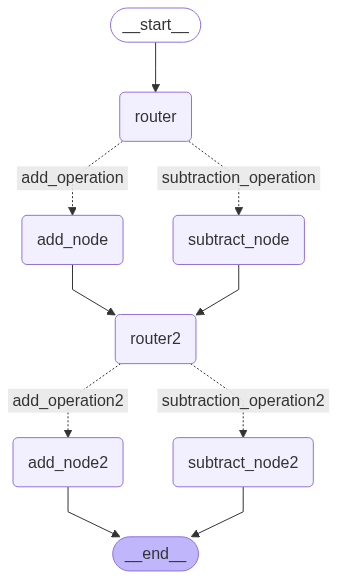

In [17]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [21]:
ans = app.invoke({'number1': 11,'number2':4,'operation1':'-','number3':4,'number4': 5,'operation2':'+'})
print(ans['finalNumber1'], ans['finalNumber2'])

7 9
